# Sim star 1 

Alex L provided freqs from MESA grid.

In [1]:
import numpy as np
import asterion as ast
from asterion import GlitchModel, Inference
import matplotlib.pyplot as plt

ast.style.use("asterion-light")

In [18]:

nu_max = (3811, 15)  # in microhertz
delta_nu = (152.3, 1.5)   # in microhertz
teff = (5115, 150)    # in Kelvin

In [19]:
from astroquery.vizier import Vizier

In [46]:
n = [18, 19, 20, 21, 22, 23, 24, 25, 26]
nu = [2945.76, 3095.44, 3246.02, 3397.06, 3547.96, 3699.27, 3850.73, 4002.39, 4154.72]
nu_err = np.array([0.5, 0.2, 0.1, 0.1, 0.05, 0.05, 0.1, 0.3, 0.5])/3.

In [47]:
model = GlitchModel(nu_max, delta_nu, teff=teff)

In [48]:
infer = Inference(model, n=n, nu=nu, nu_err=nu_err, seed=10)
infer.prior_predictive()  # <-- check prior is sensible
prior_data = infer.get_data()

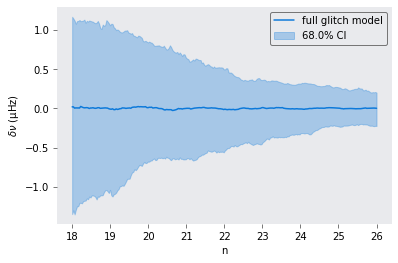

In [49]:
ast.plot_glitch(prior_data, group='prior');

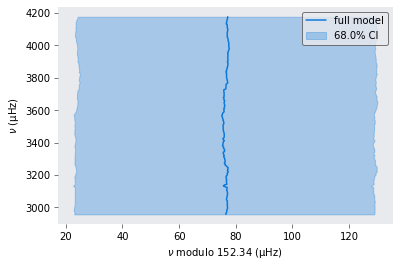

In [50]:
ast.plot_echelle(prior_data, group='prior');

In [51]:
infer.sample()
infer.posterior_predictive()
data = infer.get_data()

Running nested sampling using the 'multi_ellipsoid' sampler with 50 live points and 50000 maximum samples...


/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:293: FutureWarning: jax.tree_map is deprecated, and will be removed in a future release. Use jax.tree_util.tree_map instead.
  x_dead_new = tree_map(lambda x: x[i_min], state.live_points_X)
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:550: FutureWarning: jax.tree_multimap is deprecated, and will be removed in a future release. Use jax.tree_util.tree_multimap instead.
  live_points_U = tree_multimap(
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jax/_src/tree_util.py:205: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  warnings.warn('jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() '
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:553: FutureWarning

Completed in 15.6 seconds.


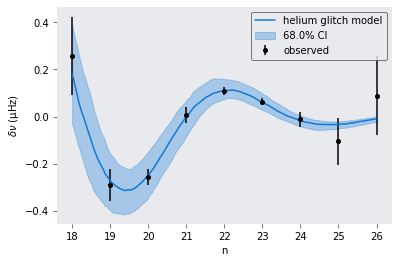

In [52]:
ast.plot_glitch(data, kind='He');

(-0.1, 0.1)

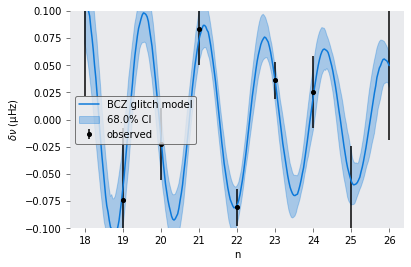

In [53]:
ax = ast.plot_glitch(data, kind='CZ')
ax.set_ylim(-0.1, 0.1)

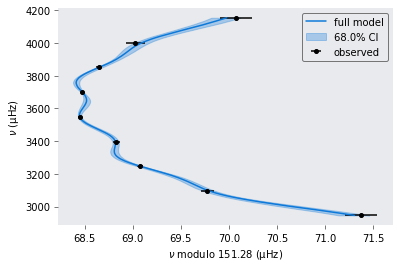

In [54]:
ast.plot_echelle(data);

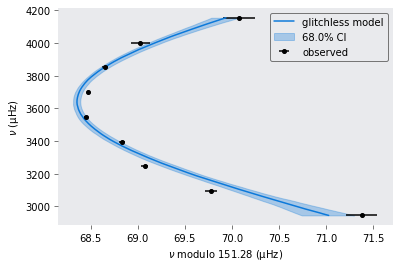

In [55]:
ast.plot_echelle(data, kind='glitchless');

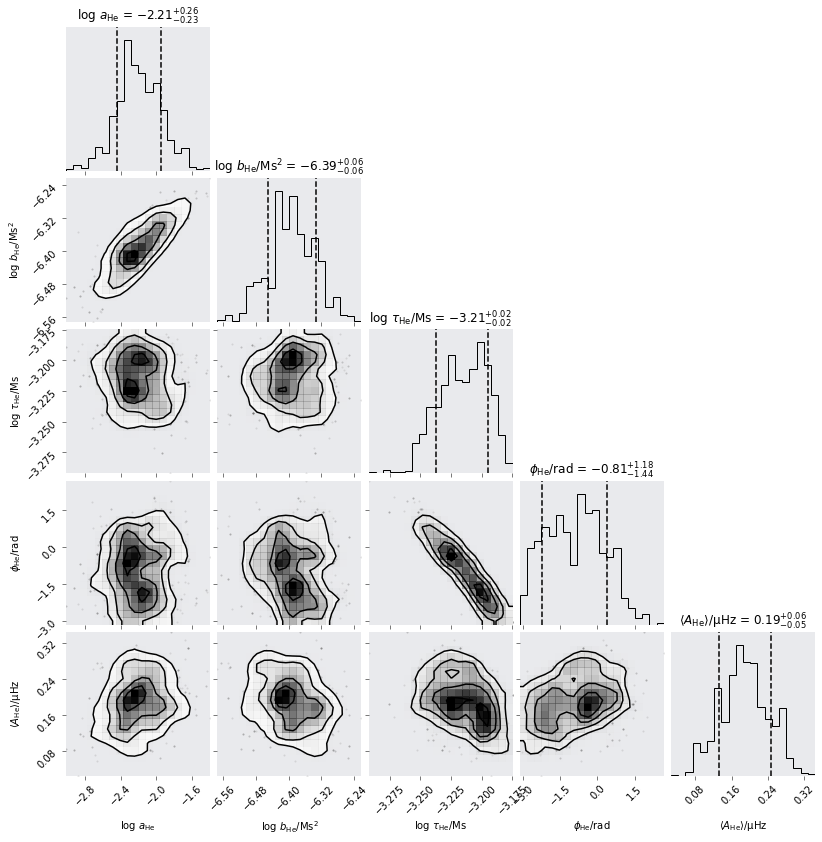

In [56]:
ast.plot_corner(data, var_names=['log_a_he', 'log_b_he', 'log_tau_he', 'phi_he', 'he_amplitude']);

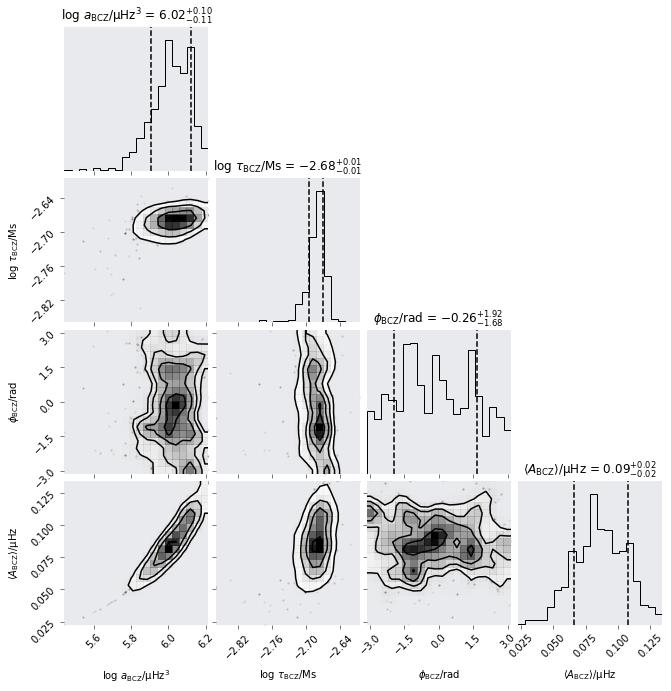

In [57]:
ast.plot_corner(data, var_names=['log_a_cz', 'log_tau_cz', 'phi_cz', 'cz_amplitude']);

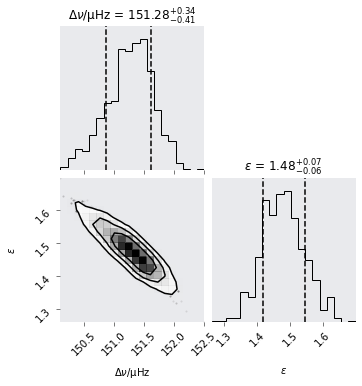

In [58]:
ast.plot_corner(data, var_names=['delta_nu', 'epsilon']);